In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing

Importing Dataset

In [ ]:
import pandas as pd
raw_reviews = pd.read_csv('/content/drive/MyDrive/Mini_Project/Musical_instruments_reviews.csv')
## print shape of dataset with rows and columns and information
print ("The shape of the  data is (row, column):"+ str(raw_reviews.shape))
print (raw_reviews.info())

The shape of the  data is (row, column):(10261, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB
None


In [ ]:
raw_reviews

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


**Dataset Details:**

This file has reviewer ID , User ID, Reviewer Name, Reviewer text, helpful, Summary(obtained from Reviewer text),Overall Rating on a scale 5, Review time

Description of columns in the file:

* reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
* asin - ID of the product, e.g. 0000013714
* reviewerName - name of the reviewer
* helpful - helpfulness rating of the review, e.g. 2/3
* reviewText - text of the review
* overall - rating of the product
* summary - summary of the review
* unixReviewTime - time of the review (unix time)
* reviewTime - time of the review (raw)



Preprocessing And Cleaning

In [ ]:
# Handling NaN values

#Creating a copy
process_reviews=raw_reviews.copy()

#Checking for null values
process_reviews.isnull().sum()

,0
reviewerID,0
asin,0
reviewerName,27
helpful,0
reviewText,7
overall,0
summary,0
unixReviewTime,0
reviewTime,0


In [ ]:
process_reviews.shape

(10261, 9)

In [ ]:
#Dropping duplicates
process_reviews = process_reviews.drop_duplicates()
process_reviews.shape

(10227, 9)

In [ ]:
#Dropping null values
process_reviews = process_reviews.dropna()
process_reviews.shape

(10227, 9)

In [ ]:
process_reviews.isnull().sum()


,0
reviewerID,0
asin,0
reviewerName,0
helpful,0
reviewText,0
overall,0
summary,0
unixReviewTime,0
reviewTime,0


# Text Preprocessing

Concatenating review text and summary

In [ ]:
#Let's combine review text and summary column. The sentiments won't be contradicting in nature.

process_reviews['reviews']=process_reviews['reviewText']+process_reviews['summary']
process_reviews=process_reviews.drop(['reviewText', 'summary'], axis=1)
process_reviews.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...


In [ ]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords

# Ensure stopwords have been downloaded
nltk.download('stopwords')

# Read reviews from CSV file
df_reviews = process_reviews

# Function for text preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply preprocessing to each review
df_reviews['Processed_Review'] = df_reviews['reviews'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_reviews.to_csv('/content/drive/MyDrive/Mini_Project/preprocessed_reviews.csv', index=False)

In [ ]:
df_reviews.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,Processed_Review
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac...",much write exactly supposed filters pop sounds...
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...,product exactly quite affordablei realized dou...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...,primary job device block breath would otherwis...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...,nice windscreen protects mxl mic prevents pops...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...,pop filter great looks performs like studio fi...


In [ ]:
df_reviews.shape

(10227, 9)

**The preprocessing process involves several important steps:**

1. Converting text to lowercase
2. Removing punctuation
3. Removing stop words (common words that don’t contribute much meaning in sentiment analysis)

The `preprocess_text` function is applied to each review using the pandas apply method. The preprocessing results are then saved in a new CSV file.



# VADER sentiment analyzer for sentiment labeling

To label the data, we use VADER (Valence Aware Dictionary and sEntiment Reasoner), a rule-based sentiment analysis model.

In [ ]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 9.3 MB/s eta 0:00:00


In [ ]:
import torch
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to label sentiment based on polarity score
def get_sentiment(score):
    if score >= 0.05:
        return 1  # Positive sentiment (1)
    elif score <= -0.05:
        return 0  # Negative sentiment (0)
    else:
        return None  # Neutral (we will exclude these)

# Read preprocessed data
df_reviews = pd.read_csv('/content/drive/MyDrive/Mini_Project/preprocessed_reviews.csv')

# Label each review with sentiment
df_reviews['Sentiment'] = df_reviews['Processed_Review'].apply(lambda x: get_sentiment(analyzer.polarity_scores(x)['compound']))

# Filter out only positive and negative reviews (exclude None)
df_filtered = df_reviews[df_reviews['Sentiment'].isin([0, 1])]

In [ ]:
df_filtered.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,Processed_Review,Sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac...",much write exactly supposed filters pop sounds...,1.0
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...,product exactly quite affordablei realized dou...,1.0
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...,primary job device block breath would otherwis...,0.0
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...,nice windscreen protects mxl mic prevents pops...,1.0
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...,pop filter great looks performs like studio fi...,1.0


In [ ]:
df_filtered.tail()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,Processed_Review,Sentiment
10222,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]",5.0,1405814400,"07 20, 2014","Great, just as expected. Thank to all.Five Stars",great expected thank allfive stars,1.0
10223,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",5.0,1404259200,"07 2, 2014",I've been thinking about trying the Nanoweb st...,ive thinking trying nanoweb strings bit put hi...,1.0
10224,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",4.0,1405987200,"07 22, 2014",I have tried coated strings in the past ( incl...,tried coated strings past including elixirs ne...,0.0
10225,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]",4.0,1404172800,"07 1, 2014","Well, MADE by Elixir and DEVELOPED with Taylor...",well made elixir developed taylor guitars stri...,1.0
10226,A2WA8TDCTGUADI,B00JBIVXGC,TheTerrorBeyond,"[0, 0]",4.0,1405468800,"07 16, 2014","These strings are really quite good, but I wou...",strings really quite good wouldnt call perfect...,1.0


In [ ]:
df_filtered['Sentiment'].value_counts()

,count
Sentiment,
1.0,9239
0.0,703


VADER provides a sentiment score for each review, which is then converted into a categorical label (positive or negative) using the `get_sentiment` function. The labeling results are added to the DataFrame as a new column.

# Sentiment Analysis using BERT

Train the BERT model for sentiment classification.

**Import Libraries and Dataset**

In [ ]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, Dataset, RandomSampler, SequentialSampler
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

# Check if CUDA is available and set the device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
data = df_filtered.copy()
data.head(10)

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,Processed_Review,Sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac...",much write exactly supposed filters pop sounds...,1.0
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...,product exactly quite affordablei realized dou...,1.0
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...,primary job device block breath would otherwis...,0.0
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...,nice windscreen protects mxl mic prevents pops...,1.0
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...,pop filter great looks performs like studio fi...,1.0
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",5.0,1356048000,"12 21, 2012",So good that I bought another one. Love the h...,good bought another one love heavy cord gold c...,1.0
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]",5.0,1390089600,"01 19, 2014","I have used monster cables for years, and with...",used monster cables years good reason lifetime...,1.0
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",3.0,1353024000,"11 16, 2012",I now use this cable to run from the output of...,use cable run output pedal chain input fender ...,1.0
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",5.0,1215302400,"07 6, 2008",Perfect for my Epiphone Sheraton II. Monster ...,perfect epiphone sheraton ii monster cables we...,1.0
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",5.0,1389139200,"01 8, 2014",Monster makes the best cables and a lifetime w...,monster makes best cables lifetime warranty do...,1.0


In [ ]:
data.tail(10)

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,Processed_Review,Sentiment
10217,A3M1PLEYNDEYO8,B00JBIVXGC,"G. Thomas ""Tom""","[0, 0]",5.0,1404172800,"07 1, 2014",True to phosphor bronze these strings have a m...,true phosphor bronze strings mellow full sound...,1.0
10218,A1SD1C8XK3Z3V1,B00JBIVXGC,"guitfiddleblue ""guitfiddleblue""","[0, 0]",5.0,1404086400,"06 30, 2014",I've used Elixirs for about five years now. Th...,ive used elixirs five years set offers great s...,1.0
10219,A2VRAT69JDAD3W,B00JBIVXGC,"Jason Whitt ""Whittmeister""","[0, 0]",4.0,1405900800,"07 21, 2014","I'm a D'Addario man myself, but hey free is fr...",im daddario man hey free free jumped chance tr...,1.0
10220,A306NASGVUDFKF,B00JBIVXGC,"Jeffrey E ""jeffinaustintx""","[0, 0]",5.0,1404432000,"07 4, 2014",I really like these strings. While they are n...,really like strings quite bright sounding unco...,1.0
10221,A1TSKKBNV38E8Y,B00JBIVXGC,"K. Harriger ""K.R. Harriger""","[0, 0]",3.0,1403654400,"06 25, 2014",I have lots of friends who play these strings....,lots friends play strings love string like the...,1.0
10222,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]",5.0,1405814400,"07 20, 2014","Great, just as expected. Thank to all.Five Stars",great expected thank allfive stars,1.0
10223,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",5.0,1404259200,"07 2, 2014",I've been thinking about trying the Nanoweb st...,ive thinking trying nanoweb strings bit put hi...,1.0
10224,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",4.0,1405987200,"07 22, 2014",I have tried coated strings in the past ( incl...,tried coated strings past including elixirs ne...,0.0
10225,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]",4.0,1404172800,"07 1, 2014","Well, MADE by Elixir and DEVELOPED with Taylor...",well made elixir developed taylor guitars stri...,1.0
10226,A2WA8TDCTGUADI,B00JBIVXGC,TheTerrorBeyond,"[0, 0]",4.0,1405468800,"07 16, 2014","These strings are really quite good, but I wou...",strings really quite good wouldnt call perfect...,1.0


**Tokenizing Text**

In [ ]:
# Tokenization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Custom Dataset Class
class SentimentDataset(Dataset):
    def __init__(self, reviews, labels, tokenizer, max_len):
        self.reviews = reviews
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, item):
        review = str(self.reviews[item])
        label = self.labels[item]

        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=True,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'token_type_ids': encoding['token_type_ids'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


**Split data**

In [ ]:
# Split data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)
train_dataset = SentimentDataset(
    reviews=train_data.Processed_Review.to_numpy(),
    labels=train_data.Sentiment.to_numpy(),
    tokenizer=tokenizer,
    max_len=128
)
test_dataset = SentimentDataset(
    reviews=test_data.Processed_Review.to_numpy(),
    labels=test_data.Sentiment.to_numpy(),
    tokenizer=tokenizer,
    max_len=128
)

train_dataloader = DataLoader(train_dataset, batch_size=32, sampler=RandomSampler(train_dataset))
test_dataloader = DataLoader(test_dataset, batch_size=32, sampler=SequentialSampler(test_dataset))


## MODEL TRAINING

**Set Up The Model**

In [ ]:
# Load BERT model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


**Training the Model**

In [ ]:
import time
from tqdm import tqdm

# Training loop with epoch
epochs = 10
for epoch in range(epochs):
    start_time = time.time()

    model.train()
    total_loss = 0

    # Wrap the training dataloader with tqdm for progress tracking
    for batch in tqdm(train_dataloader, desc=f'Epoch {epoch+1}/{epochs}'):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        token_type_ids = batch['token_type_ids'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_dataloader)

    end_time = time.time()
    epoch_time = end_time - start_time

    print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}, Time: {epoch_time:.2f} seconds')

Epoch 1/10: 100%|██████████| 218/218 [02:20<00:00,  1.55it/s]


Epoch 1/10, Loss: 0.2247, Time: 140.42 seconds


Epoch 2/10: 100%|██████████| 218/218 [02:21<00:00,  1.54it/s]


Epoch 2/10, Loss: 0.1310, Time: 141.93 seconds


Epoch 3/10: 100%|██████████| 218/218 [02:22<00:00,  1.53it/s]


Epoch 3/10, Loss: 0.0647, Time: 142.61 seconds


Epoch 4/10: 100%|██████████| 218/218 [02:22<00:00,  1.53it/s]


Epoch 4/10, Loss: 0.0285, Time: 142.15 seconds


Epoch 5/10: 100%|██████████| 218/218 [02:22<00:00,  1.53it/s]


Epoch 5/10, Loss: 0.0197, Time: 142.64 seconds


Epoch 6/10: 100%|██████████| 218/218 [02:22<00:00,  1.53it/s]


Epoch 6/10, Loss: 0.0116, Time: 142.57 seconds


Epoch 7/10: 100%|██████████| 218/218 [02:22<00:00,  1.53it/s]


Epoch 7/10, Loss: 0.0129, Time: 142.55 seconds


Epoch 8/10: 100%|██████████| 218/218 [02:22<00:00,  1.53it/s]


Epoch 8/10, Loss: 0.0050, Time: 142.37 seconds


Epoch 9/10: 100%|██████████| 218/218 [02:22<00:00,  1.53it/s]


Epoch 9/10, Loss: 0.0092, Time: 142.23 seconds


Epoch 10/10: 100%|██████████| 218/218 [02:22<00:00,  1.53it/s]

Epoch 10/10, Loss: 0.0066, Time: 142.50 seconds


**Evaluating the Model**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, roc_auc_score
from tqdm import tqdm

def evaluate_model(model, dataloader, device):
    model.eval()
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            token_type_ids = batch['token_type_ids'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
            logits = outputs.logits
            predicted_labels = torch.argmax(logits, dim=1).cpu().numpy().tolist()
            predictions.extend(predicted_labels)
            true_labels.extend(labels.cpu().numpy().tolist())

    accuracy = accuracy_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    mcc = matthews_corrcoef(true_labels, predictions)
    auc = roc_auc_score(true_labels, predictions)

    return accuracy, f1, mcc, auc

accuracy, f1, mcc, auc = evaluate_model(model, test_dataloader, device)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"AUC: {auc:.4f}")

Evaluating: 100%|██████████| 94/94 [00:23<00:00,  4.04it/s]

Accuracy: 0.9521
F1-Score: 0.9746
MCC: 0.5583
AUC: 0.7199


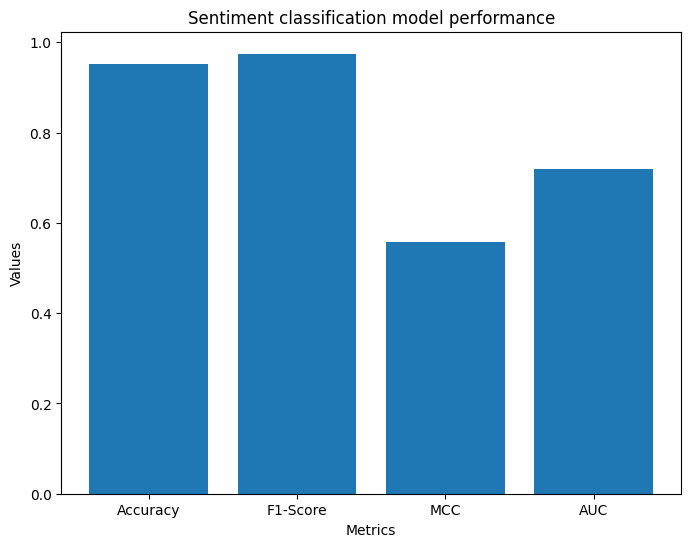

In [ ]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'F1-Score', 'MCC', 'AUC']
values = [accuracy, f1, mcc, auc]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Sentiment classification model performance')
plt.show()


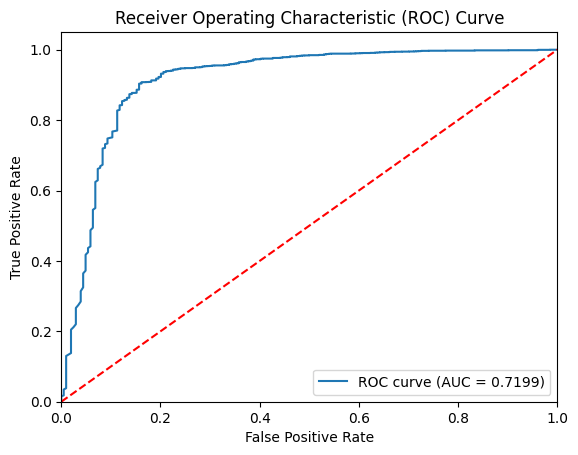

In [ ]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predictions)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Recommender System using SVD method

## Import Libraries

In [ ]:
import pandas as pd
# Load ratings data
ratings = pd.read_csv('/content/drive/MyDrive/Testing/rating.csv')
ratings.head()

,reviewerID,asin,overall
0,A2IBPI20UZIR0U,1384719342,5.0
1,A14VAT5EAX3D9S,1384719342,5.0
2,A195EZSQDW3E21,1384719342,5.0
3,A2C00NNG1ZQQG2,1384719342,5.0
4,A94QU4C90B1AX,1384719342,5.0


In [ ]:
ratings.shape

(10227, 3)

In [ ]:
df = ratings[['reviewerID','asin','overall']]

In [ ]:
df.shape

(10227, 3)

In [ ]:
df.columns =['userId', 'itemId', 'rating']

In [ ]:
df.head()

,userId,itemId,rating
0,A2IBPI20UZIR0U,1384719342,5.0
1,A14VAT5EAX3D9S,1384719342,5.0
2,A195EZSQDW3E21,1384719342,5.0
3,A2C00NNG1ZQQG2,1384719342,5.0
4,A94QU4C90B1AX,1384719342,5.0


# SVD

In [ ]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 11.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357282 sha256=8e848c4758366b8a54c375ab11de4cb31d379a02dace9eba169349a26e90ab6c
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


pearson

In [ ]:
# Import required libraries
from surprise import Dataset, Reader, KNNBasic, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
import pandas as pd

# Define the reader format
reader = Reader(rating_scale=(df['rating'].min(), df['rating'].max()))

# Load the data into Surprise's format
data = Dataset.load_from_df(df[['userId', 'itemId', 'rating']], reader)

# Split the dataset into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# --------- 1. User-based Collaborative Filtering (User-based KNN) ---------
user_cf = KNNBasic(sim_options={'name': 'pearson', 'user_based': True})
user_cf.fit(trainset)
user_predictions = user_cf.test(testset)

# Calculate RMSE and MAE for User-based CF
user_cf_rmse = accuracy.rmse(user_predictions, verbose=False)
user_cf_mae = accuracy.mae(user_predictions, verbose=False)

# --------- 2. Item-based Collaborative Filtering (Item-based KNN) ---------
item_cf = KNNBasic(sim_options={'name': 'pearson', 'user_based': False})
item_cf.fit(trainset)
item_predictions = item_cf.test(testset)

# Calculate RMSE and MAE for Item-based CF
item_cf_rmse = accuracy.rmse(item_predictions, verbose=False)
item_cf_mae = accuracy.mae(item_predictions, verbose=False)

# --------- 3. Model-Based CF (SVD) ---------
svd_model = SVD()
svd_model.fit(trainset)
svd_predictions = svd_model.test(testset)

# Calculate RMSE and MAE for Model-Based CF (SVD)
svd_rmse = accuracy.rmse(svd_predictions, verbose=False)
svd_mae = accuracy.mae(svd_predictions, verbose=False)

# --------- Print the Results ---------
print(f"User-based CF RMSE: {user_cf_rmse}")
print(f"Item-based CF RMSE: {item_cf_rmse}")
print(f"Model-Based CF RMSE: {svd_rmse}\n")

print(f"User-based CF MAE: {user_cf_mae}")
print(f"Item-based CF MAE: {item_cf_mae}")
print(f"Model-Based CF MAE: {svd_mae}")

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
User-based CF RMSE: 0.858133568465196
Item-based CF RMSE: 0.8747607873500957
Model-Based CF RMSE: 0.8328058279774445

User-based CF MAE: 0.6712212185039115
Item-based CF MAE: 0.6637559791855762
Model-Based CF MAE: 0.6124424299054406


In [ ]:
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Dataset, Reader, KNNBasic, SVD

# Assuming df is your DataFrame with 'userId', 'itemId', 'rating' columns
# and you have already trained your SVD model (svd_model)

# Create a list to store predictions
predictions_list = []

# Iterate through the DataFrame and predict for each row
for index, row in df.iterrows():
  user_id = row['userId']
  item_id = row['itemId']
  # Predict the rating for the current user and item
  prediction = svd_model.predict(user_id, item_id)
  # Append the prediction to the list
  predictions_list.append(prediction.est)

# Print the first 10 predictions
print(predictions_list[:10])

# You can also create a new column in your DataFrame to store the predicted ratings
df['predicted_rating'] = predictions_list

[4.883998329479311, 4.770227466469325, 4.886596039463393, 4.631864331158022, 4.795758501078804, 4.604021410679863, 4.720305126298486, 3.8831279601719078, 4.776383408045895, 4.604151051701802]


In [ ]:
display(df.head())

,userId,itemId,rating,predicted_rating
0,A2IBPI20UZIR0U,1384719342,5.0,4.883998
1,A14VAT5EAX3D9S,1384719342,5.0,4.770227
2,A195EZSQDW3E21,1384719342,5.0,4.886596
3,A2C00NNG1ZQQG2,1384719342,5.0,4.631864
4,A94QU4C90B1AX,1384719342,5.0,4.795759


In [ ]:
display(df.tail())

,userId,itemId,rating,predicted_rating
10222,A14B2YH83ZXMPP,B00JBIVXGC,5.0,4.798054
10223,A1RPTVW5VEOSI,B00JBIVXGC,5.0,4.773773
10224,AWCJ12KBO5VII,B00JBIVXGC,4.0,4.878282
10225,A2Z7S8B5U4PAKJ,B00JBIVXGC,4.0,4.047859
10226,A2WA8TDCTGUADI,B00JBIVXGC,4.0,4.377195


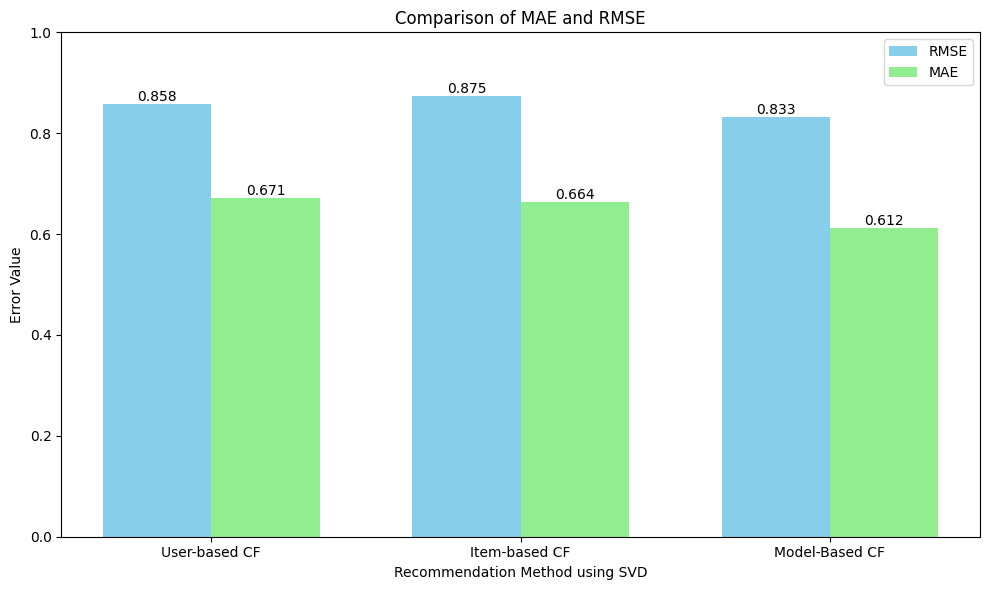

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Results for RMSE and MAE
methods = ['User-based CF', 'Item-based CF', 'Model-Based CF']
rmse_values = [user_cf_rmse, item_cf_rmse, svd_rmse]
mae_values = [user_cf_mae, item_cf_mae, svd_mae]

# Bar width and positions
bar_width = 0.35
index = np.arange(len(methods))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bars for RMSE and MAE
bar1 = ax.bar(index - bar_width/2, rmse_values, bar_width, label='RMSE', color='skyblue')
bar2 = ax.bar(index + bar_width/2, mae_values, bar_width, label='MAE', color='lightgreen')

# Adding labels and title
ax.set_xlabel('Recommendation Method using SVD')
ax.set_ylabel('Error Value')
ax.set_title('Comparison of MAE and RMSE')
ax.set_xticks(index)
ax.set_xticklabels(methods)
ax.legend()

# Set y-axis limit
ax.set_ylim(0, 1.0)

# Adding value annotations above the bars
for i in index:
    ax.text(i - bar_width/2, rmse_values[i], f'{rmse_values[i]:.3f}',
            ha='center', va='bottom', fontsize=10, color='black')
    ax.text(i + bar_width/2, mae_values[i], f'{mae_values[i]:.3f}',
            ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Singular Value Decomposition (SVD) is a powerful method for building recommendation systems, especially in collaborative filtering. Using the surprise library in Python, you can efficiently implement and evaluate an SVD-based recommendation system. By following the steps outlined above, you can create a robust system that predicts user preferences with high accuracy.

# Hybrid prediction combining recommender system and sentiment analysis using BERT



In [ ]:
df['predicted_rating'].tail()

,predicted_rating
10222,4.798054
10223,4.773773
10224,4.878282
10225,4.047859
10226,4.377195


In [ ]:
# Define the weight 'a' for the hybrid prediction
a = 0.3

df['hybrid_prediction1'] = a * df['predicted_rating'] + (1 - a) * df_filtered['Sentiment']

# Print the first 10 hybrid predictions
print(df['hybrid_prediction1'].head(10227))

0        2.165199
1        2.131068
2        1.465979
3        2.089559
4        2.138728
           ...   
10222    2.139416
10223    2.132132
10224    1.463485
10225    1.914358
10226    2.013159
Name: hybrid_prediction1, Length: 10227, dtype: float64


In [ ]:
# Define the weight 'a' for the hybrid prediction
a = 0.5

df['hybrid_prediction2'] = a * df['predicted_rating'] + (1 - a) * df_filtered['Sentiment']

# Print the first 10 hybrid predictions
print(df['hybrid_prediction2'].head(10227))

0        2.941999
1        2.885114
2        2.443298
3        2.815932
4        2.897879
           ...   
10222    2.899027
10223    2.886886
10224    2.439141
10225    2.523929
10226    2.688598
Name: hybrid_prediction2, Length: 10227, dtype: float64


In [ ]:
# Define the weight 'a' for the hybrid prediction
a = 0.7

df['hybrid_prediction3'] = a * df['predicted_rating'] + (1 - a) * df_filtered['Sentiment']

# Print the first 10 hybrid predictions
print(df['hybrid_prediction3'].head(10227))

0        3.718799
1        3.639159
2        3.420617
3        3.542305
4        3.657031
           ...   
10222    3.658638
10223    3.641641
10224    3.414797
10225    3.133501
10226    3.364037
Name: hybrid_prediction3, Length: 10227, dtype: float64


In [ ]:
# Define the weight 'a' for the hybrid prediction
a = 0.9

df['hybrid_prediction4'] = a * df['predicted_rating'] + (1 - a) * df_filtered['Sentiment']

# Print the first 10 hybrid predictions
print(df['hybrid_prediction4'].head(10227))

0        4.495598
1        4.393205
2        4.397936
3        4.268678
4        4.416183
           ...   
10222    4.418249
10223    4.396396
10224    4.390454
10225    3.743073
10226    4.039476
Name: hybrid_prediction4, Length: 10227, dtype: float64


In [ ]:
df['hybrid_prediction1'].tail()

,hybrid_prediction1
10222,2.139416
10223,2.132132
10224,1.463485
10225,1.914358
10226,2.013159


In [ ]:
df['hybrid_prediction2'].tail()

,hybrid_prediction2
10222,2.899027
10223,2.886886
10224,2.439141
10225,2.523929
10226,2.688598


In [ ]:
df['hybrid_prediction3'].tail()

,hybrid_prediction3
10222,3.658638
10223,3.641641
10224,3.414797
10225,3.133501
10226,3.364037


In [ ]:
df['hybrid_prediction4'].tail()

,hybrid_prediction4
10222,4.418249
10223,4.396396
10224,4.390454
10225,3.743073
10226,4.039476


In [ ]:
print(df['hybrid_prediction1'].isnull().sum())

285


In [ ]:
print(df['hybrid_prediction2'].isnull().sum())

285


In [ ]:
print(df['hybrid_prediction3'].isnull().sum())

285


In [ ]:
print(df['hybrid_prediction4'].isnull().sum())

285


In [ ]:
df['hybrid_prediction1'] = df['hybrid_prediction1'].fillna(0)
df['hybrid_prediction2'] = df['hybrid_prediction2'].fillna(0)
df['hybrid_prediction3'] = df['hybrid_prediction3'].fillna(0)
df['hybrid_prediction4'] = df['hybrid_prediction4'].fillna(0)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Assuming 'df' contains your DataFrame with 'rating' and 'hybrid_prediction' columns
true_ratings = df['predicted_rating']
predicted_ratings = df['hybrid_prediction1']

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(true_ratings, predicted_ratings))

# Calculate MAE
mae = mean_absolute_error(true_ratings, predicted_ratings)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


RMSE: 2.582391110157642
MAE: 2.5466619865245996


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Assuming 'df' contains your DataFrame with 'rating' and 'hybrid_prediction' columns
true_ratings = df['predicted_rating']
predicted_ratings = df['hybrid_prediction2']

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(true_ratings, predicted_ratings))

# Calculate MAE
mae = mean_absolute_error(true_ratings, predicted_ratings)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 1.9161428979023796
MAE: 1.8542502738778621


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Assuming 'df' contains your DataFrame with 'rating' and 'hybrid_prediction' columns
true_ratings = df['predicted_rating']
predicted_ratings = df['hybrid_prediction3']

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(true_ratings, predicted_ratings))

# Calculate MAE
mae = mean_absolute_error(true_ratings, predicted_ratings)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 1.293642188328005
MAE: 1.1618385612311246


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Assuming 'df' contains your DataFrame with 'rating' and 'hybrid_prediction' columns
true_ratings = df['predicted_rating']
predicted_ratings = df['hybrid_prediction4']

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(true_ratings, predicted_ratings))

# Calculate MAE
mae = mean_absolute_error(true_ratings, predicted_ratings)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 0.821257185382411
MAE: 0.4694268485843871


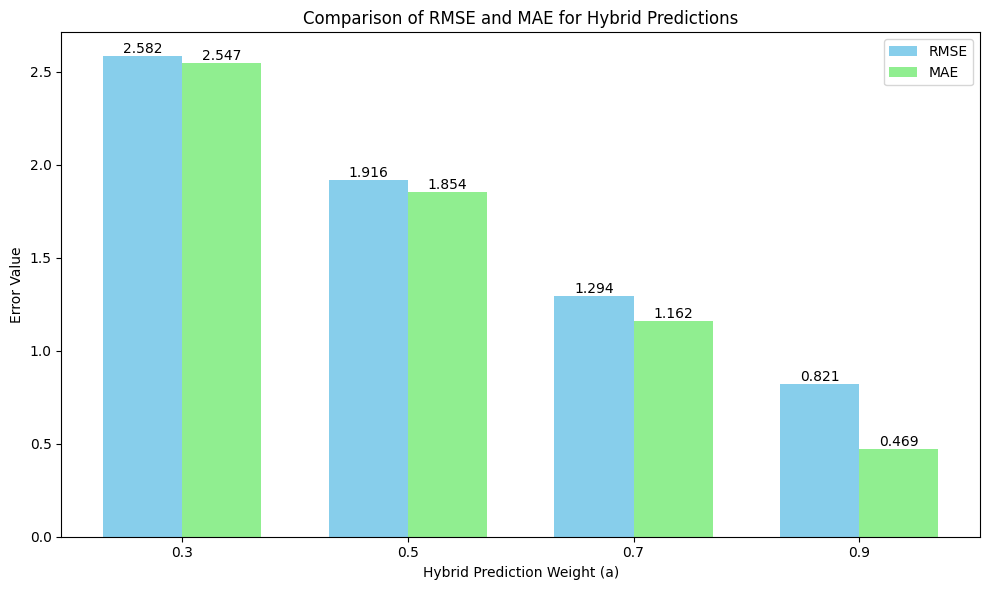

In [ ]:
# Assuming 'df' contains your DataFrame with 'rating' and 'hybrid_prediction' columns
true_ratings = df['predicted_rating']

# Calculate RMSE and MAE for each hybrid prediction
rmse_values = []
mae_values = []
hybrid_predictions = ['hybrid_prediction1', 'hybrid_prediction2', 'hybrid_prediction3', 'hybrid_prediction4']

for prediction_col in hybrid_predictions:
  predicted_ratings = df[prediction_col]
  rmse = math.sqrt(mean_squared_error(true_ratings, predicted_ratings))
  mae = mean_absolute_error(true_ratings, predicted_ratings)
  rmse_values.append(rmse)
  mae_values.append(mae)

# Plotting
weights = [0.3, 0.5, 0.7, 0.9]
bar_width = 0.35
index = np.arange(len(weights))

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index - bar_width/2, rmse_values, bar_width, label='RMSE', color='skyblue')
bar2 = ax.bar(index + bar_width/2, mae_values, bar_width, label='MAE', color='lightgreen')

ax.set_xlabel('Hybrid Prediction Weight (a)')
ax.set_ylabel('Error Value')
ax.set_title('Comparison of RMSE and MAE for Hybrid Predictions')
ax.set_xticks(index)
ax.set_xticklabels([f'{w:.1f}' for w in weights])
ax.legend()

# Adding value annotations
for i in index:
    ax.text(i - bar_width/2, rmse_values[i], f'{rmse_values[i]:.3f}',
            ha='center', va='bottom', fontsize=10, color='black')
    ax.text(i + bar_width/2, mae_values[i], f'{mae_values[i]:.3f}',
            ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()
